In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')
df.head()



,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [197]:
def catigorize_col (df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df
labels = ['not_popular', 'below_avg', 'average', 'popular']
catigorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

#Reason for doing this is that there are manu movies that are given 8+ score some with 7+ ans so on, and because of
#and because of that reading the data set gets a bit tough.

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [198]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,below_avg,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,average,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [199]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

#Reason for doing this is that there are many movies that contains more than one type of genre and because of that
#this will make our dataset difficult to read, plus it this help help us to categorise the movies based on it's genre.

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [200]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes
df.head()

datetime64[ns]


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [201]:
#Analysis No.1
#types of movies that are getting produced

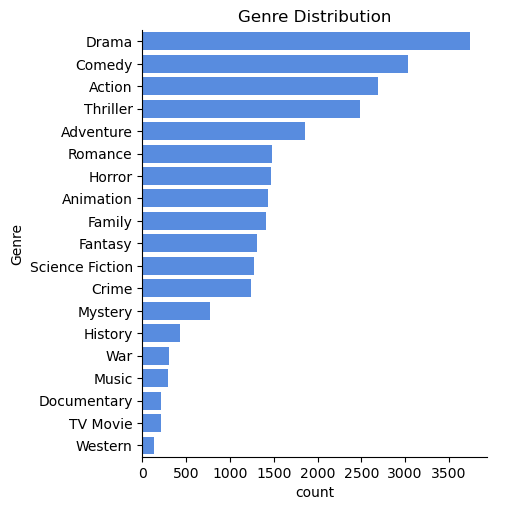

In [202]:
sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, color = '#4287f5')
plt.title('Genre Distribution')
plt.show()


In [203]:
#Analysis No.2
#Risk % after releasing the movie

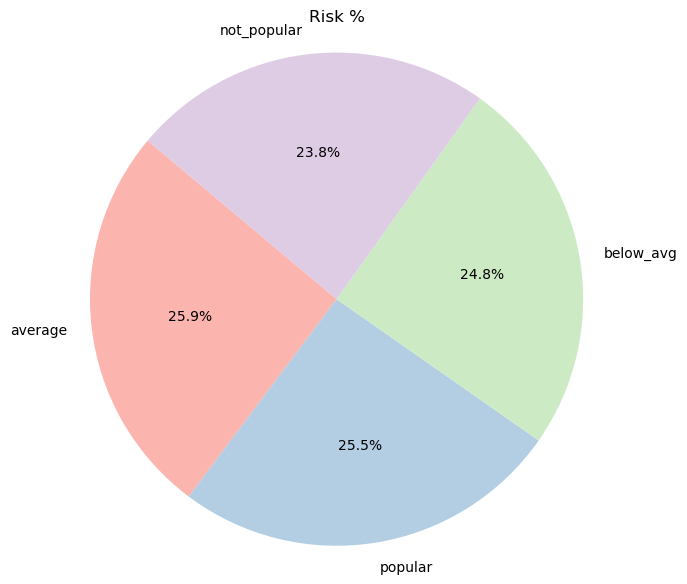

In [226]:
vote_counts = df['Vote_Average'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(vote_counts, labels=vote_counts.index, autopct='%1.1f%%',
        startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Risk %')
plt.axis('equal')  
plt.show()

In [205]:
#Analysis No.3
#Good movies are in which language

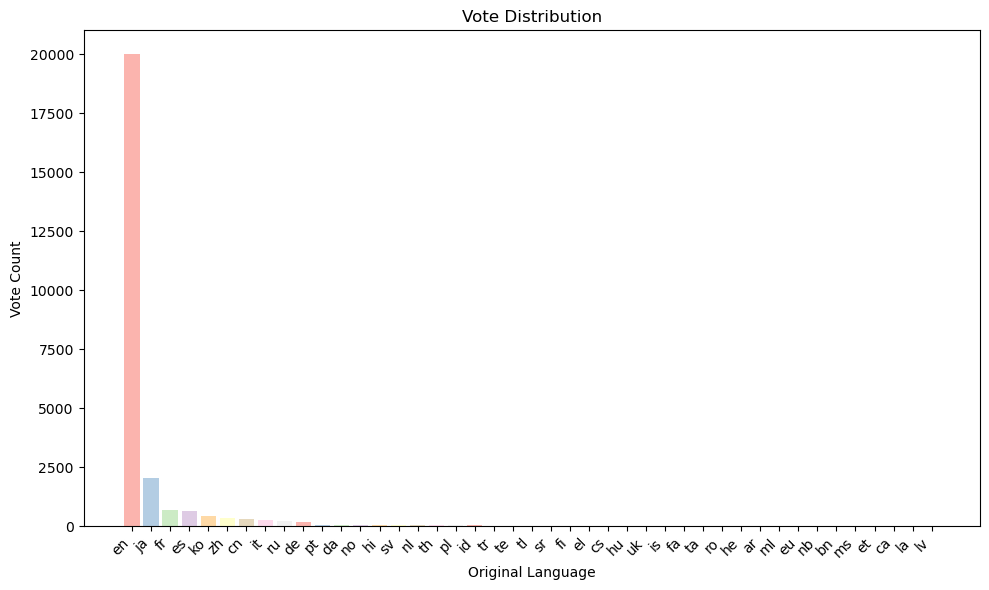

In [206]:
vote_counts = df['Original_Language'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(vote_counts.index, vote_counts.values, color=plt.cm.Pastel1.colors[:len(vote_counts)])
plt.title('Vote Distribution')
plt.xlabel('Original Language')
plt.ylabel('Vote Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [207]:
#Analysis No.4
#Genre loved most by the public

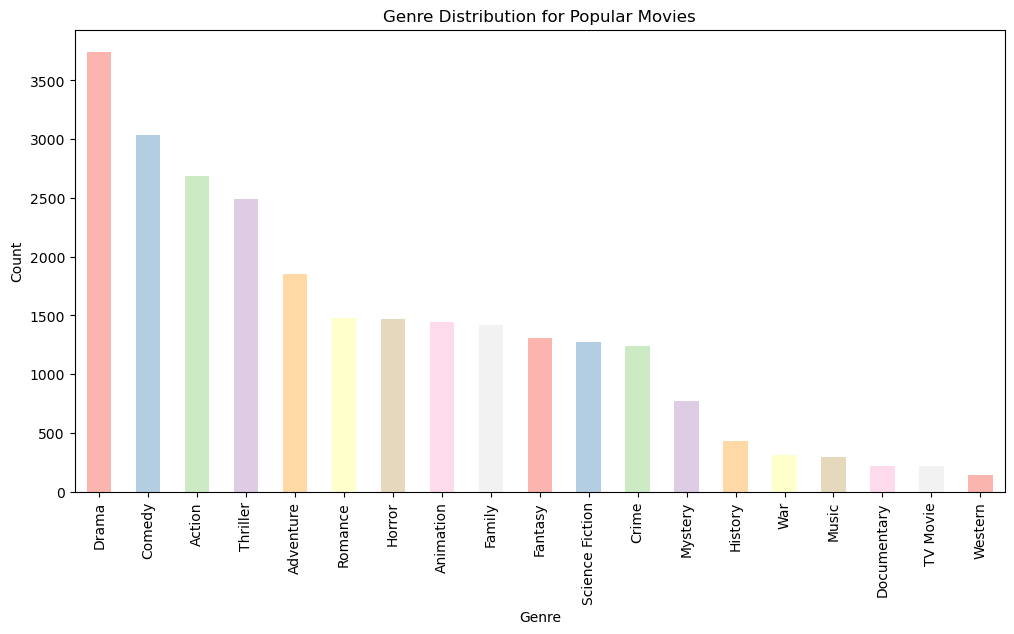

In [208]:
popular_df = df[df['Vote_Average'] == 'popular']
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color=plt.cm.Pastel1.colors[:len(genre_counts)])
plt.title('Genre Distribution for Popular Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [209]:
#Analysis No.5
#Movies released in 5 years

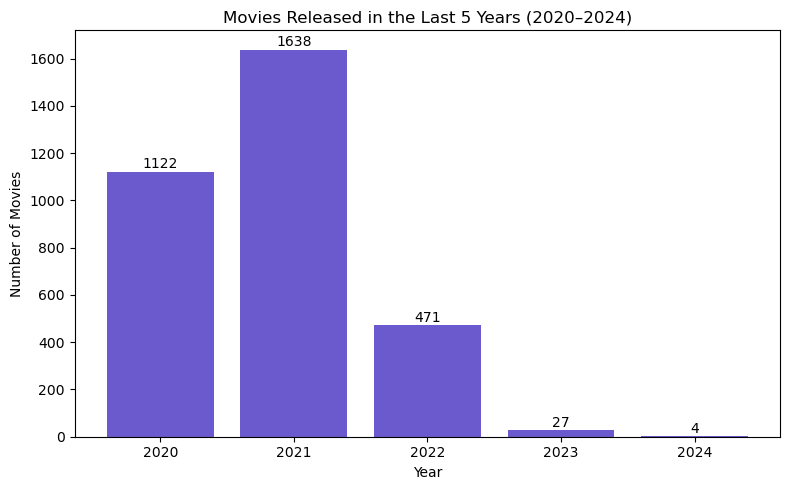

In [210]:
df['Release_Date'] = df['Release_Date'].astype(int)
last_5_years = df[df['Release_Date'].isin([2020, 2021, 2022, 2023, 2024])]
year_counts = last_5_years['Release_Date'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
bars = plt.bar(year_counts.index.astype(str), year_counts.values, color='slateblue')
plt.title('Movies Released in the Last 5 Years (2020–2024)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()